In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/NSE-TATAGLOBAL11.csv", index_col="Date", parse_dates=True)
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


# New Section

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1235 non-null   float64
 1   High                  1235 non-null   float64
 2   Low                   1235 non-null   float64
 3   Last                  1235 non-null   float64
 4   Close                 1235 non-null   float64
 5   Total Trade Quantity  1235 non-null   float64
 6   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7)
memory usage: 77.2 KB


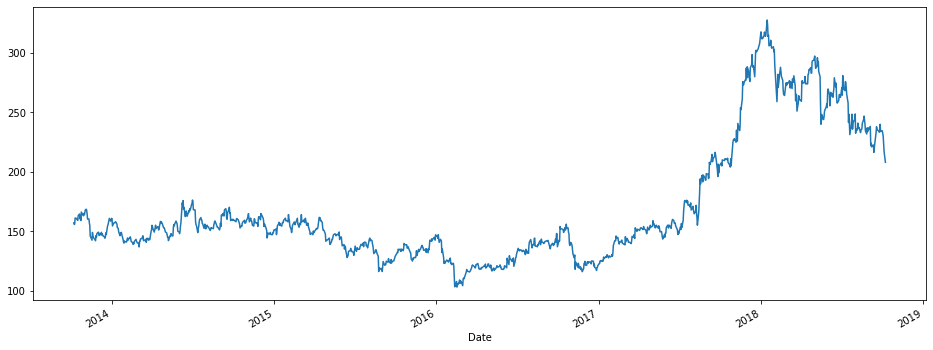

In [7]:
dataset['Open'].plot(figsize=(16,6))

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1235 non-null   float64
 1   High                  1235 non-null   float64
 2   Low                   1235 non-null   float64
 3   Last                  1235 non-null   float64
 4   Close                 1235 non-null   float64
 5   Total Trade Quantity  1235 non-null   float64
 6   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7)
memory usage: 77.2 KB


In [9]:
#dataset["Total Trade Quantity"]=dataset["Total Trade Quantity"].int.replace(',', '').astype(float)

In [10]:
# 7 days rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,225.950000,230.500000,219.571429,223.935714,224.007143,3.040937e+06,6822.042857
2018-09-26,230.521429,233.035714,223.235714,226.650000,226.735714,2.697903e+06,6134.295714
2018-09-25,232.850000,235.628571,226.964286,230.364286,230.578571,2.530739e+06,5862.415714


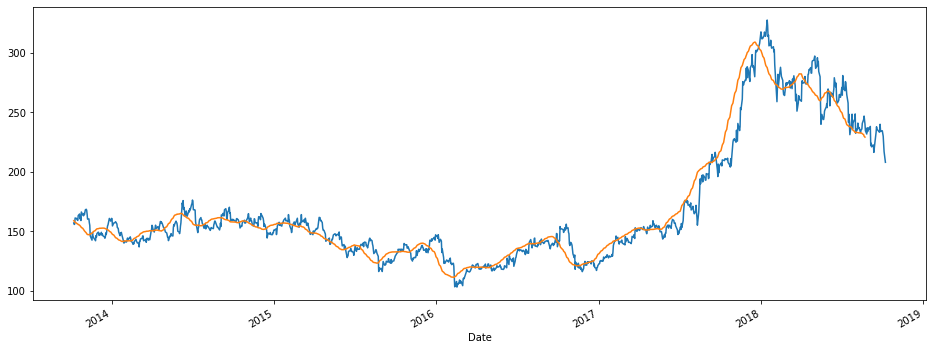

In [11]:
dataset["Open"].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

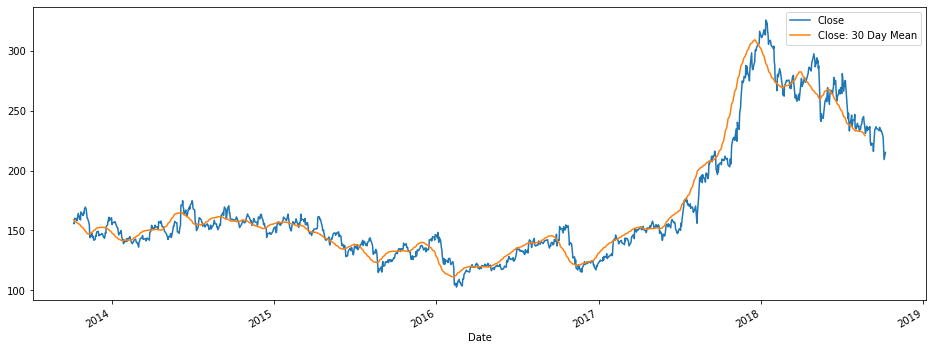

In [12]:
dataset["Close: 30 Day Mean"] = dataset["Close"].rolling(window=30).mean()
dataset[["Close","Close: 30 Day Mean"]].plot(figsize=(16,6))

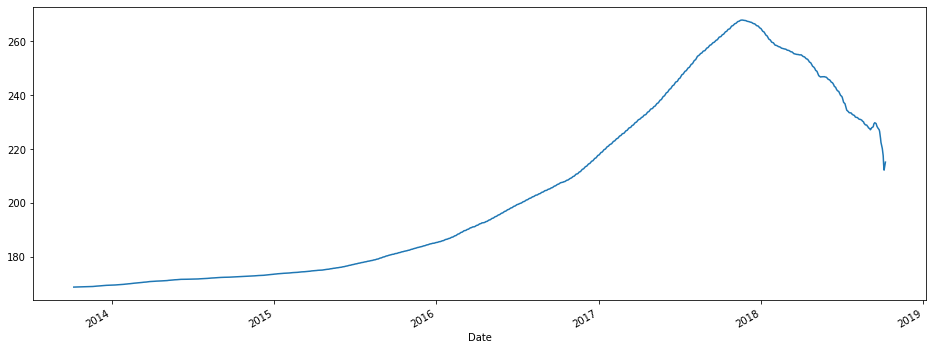

In [13]:
dataset["Close"].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [14]:
training_set=dataset["Open"]
training_set=pd.DataFrame(training_set)

In [15]:
#data cleaning
dataset.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
Close: 30 Day Mean       True
dtype: bool

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [17]:
x_train=[]
y_train=[]
for i in range(60,1235):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping
x_train =np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
regressor = Sequential()

In [20]:
regressor.add(LSTM(units = 50, return_sequences= True, input_shape= (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences= True,))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [21]:
regressor.compile(optimizer='adam', loss="mean_squared_error")

regressor.fit(x_train, y_train, epochs= 100, batch_size =32)

Epoch 1/100
37/37 [==============================] - 24s 85ms/step - loss: 0.0514
Epoch 2/100
37/37 [==============================] - 3s 85ms/step - loss: 0.0043
Epoch 3/100
37/37 [==============================] - 3s 83ms/step - loss: 0.0042
Epoch 4/100
37/37 [==============================] - 3s 84ms/step - loss: 0.0046
Epoch 5/100
37/37 [==============================] - 3s 84ms/step - loss: 0.0032
Epoch 6/100
37/37 [==============================] - 3s 86ms/step - loss: 0.0031
Epoch 7/100
37/37 [==============================] - 3s 84ms/step - loss: 0.0037
Epoch 8/100
37/37 [==============================] - 3s 85ms/step - loss: 0.0034
Epoch 9/100
37/37 [==============================] - 3s 84ms/step - loss: 0.0029
Epoch 10/100
37/37 [==============================] - 3s 85ms/step - loss: 0.0031
Epoch 11/100
37/37 [==============================] - 3s 85ms/step - loss: 0.0029
Epoch 12/100
37/37 [==============================] - 3s 85ms/step - loss: 0.0028
Epoch 13/100
37/37 [====

In [22]:
dataset_test = pd.read_csv("/content/drive/MyDrive/NSE-TATAGLOBAL11.csv",index_col="Date",parse_dates=True)

In [23]:
real_stock_price=dataset_test.iloc[:, 1:2].values

In [24]:
dataset_test.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [25]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1235 non-null   float64
 1   High                  1235 non-null   float64
 2   Low                   1235 non-null   float64
 3   Last                  1235 non-null   float64
 4   Close                 1235 non-null   float64
 5   Total Trade Quantity  1235 non-null   float64
 6   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7)
memory usage: 77.2 KB


In [26]:
test_set=dataset_test["Open"]
test_set=pd.DataFrame(test_set)

In [27]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1235 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [28]:
dataset_total= pd.concat((dataset["Open"],dataset_test["Open"]), axis=0)
inputs= dataset_total[len(dataset_total)-len(dataset_test)- 60:].values
inputs= inputs.reshape(-1,1)
inputs= sc.transform(inputs)
x_test= []
for i in range(60,1235):
  x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

In [29]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1175 non-null   float32
dtypes: float32(1)
memory usage: 4.7 KB


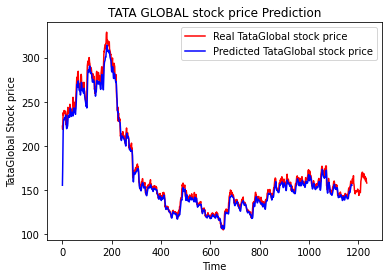

In [30]:
plt.plot(real_stock_price, color='red', label= 'Real TataGlobal stock price')
plt.plot(predicted_stock_price, color='blue', label= 'Predicted TataGlobal stock price')
plt.title('TATA GLOBAL stock price Prediction')
plt.xlabel('Time')
plt.ylabel('TataGlobal Stock price')
plt.legend()
plt.show()